## Graphing the top ten anomalies found in october

-----

This notebook intends to graph CPU, Memory for 20 minute chunks of time that recieved large MAE scores from the autoencoder. 

How was the data created:

   * An autoencoder was trained on september 2022, and then asked to evaluate 15 days in october. 
   
Evaluation process:
   * Take each Node's worth of data
        * segment into 20 minute chunks and run it through the autoencoder
        
Visualization Process:
* We will find the top 10 MAE scores for CPU, Memory, CPU
    * Each MAE score corresponds to a 20 minute interval of node data
    * We will graph the corresponding 20 minutes for the node whose data produced the large MAE score
    
---



imports

In [1]:
import _pickle as cPickle
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

load in the raw data, residuals, and reconstructions on a point per point basis for all nodes

In [2]:
df_all_nodes = pd.read_csv("df_trained_list")

In [3]:
df_all_nodes['Timestamp'] = pd.to_datetime(df_all_nodes['Timestamp'])

In [4]:
len(df_all_nodes.InstanceId.unique())

421

In [18]:
df_all_nodes.head()

,Unnamed: 0,Timestamp,InstanceId,node_cpu_utilization,node_memory_utilization,node_network_total_bytes,predictions_cpu,predictions_memory,predictions_network,errors_cpu,errors_memory,errors_network
0,0,2022-10-01 00:01:20.521,i-0b54b30401f3174b8,7.823234,1.838851,463845.099542,0.093206,-0.962416,-0.812987,0.012773,0.072969,0.113921
1,1,2022-10-01 00:02:29.141,i-0b54b30401f3174b8,7.817208,1.840024,465904.253782,-0.302550,0.088367,-0.103033,0.066614,0.036560,0.000775
2,2,2022-10-01 00:03:22.958,i-0b54b30401f3174b8,7.822813,1.843515,466578.301804,0.093128,2.935983,0.162037,0.020316,0.348092,0.005647
3,3,2022-10-01 00:04:11.351,i-0b54b30401f3174b8,7.817801,1.839685,467462.568148,-0.317625,-0.258312,0.478136,0.004723,0.004693,0.043679
4,4,2022-10-01 00:05:18.123,i-0b54b30401f3174b8,7.838849,1.838705,465254.086973,1.176708,-1.018584,-0.355574,0.160465,0.151991,0.007063


load in the MAE scores for node ID, start time, end time

In [5]:
with open('slice_scores_df.pkl', 'rb') as f:
    mae_table = pickle.load(f)

In [6]:
mae_table.head()

,start_time,end_time,InstanceId,mae_cpu,mae_memory,mae_netwrk
0,2022-10-01 00:01:20.521,2022-10-01 00:21:10.034,i-0b54b30401f3174b8,0.083906,0.084480,0.069946
1,2022-10-01 00:21:10.034,2022-10-01 00:41:27.290,i-0b54b30401f3174b8,0.087445,0.081898,0.062520
2,2022-10-01 00:41:27.290,2022-10-01 01:01:27.363,i-0b54b30401f3174b8,0.083261,0.086643,0.075792
3,2022-10-01 01:01:27.363,2022-10-01 01:21:14.343,i-0b54b30401f3174b8,0.083110,0.083903,0.072982
4,2022-10-01 01:21:14.343,2022-10-01 01:41:22.682,i-0b54b30401f3174b8,0.077993,0.085943,0.078357


In [7]:
len(mae_table.InstanceId.unique())

421

print the top ten anomalies found cpu

In [8]:
top_ten_cpu = mae_table.sort_values('mae_cpu',ascending=False).head(10)
top_ten_cpu.head(10)

,start_time,end_time,InstanceId,mae_cpu,mae_memory,mae_netwrk
94317,2022-10-10 08:21:33.580,2022-10-10 08:41:33.320,i-058ba227a031e03d2,0.115596,0.086428,0.100346
86548,2022-10-07 14:33:27.715,2022-10-07 14:53:23.026,i-0478a209a99ff9e04,0.114904,0.075948,0.097368
9786,2022-10-07 09:27:49.688,2022-10-07 09:50:14.185,i-0be6bf586e60ad4f3,0.114574,0.044746,0.085663
43126,2022-10-04 08:39:29.687,2022-10-04 08:59:37.441,i-0fa7018c6ca661029,0.114517,0.083955,0.089962
12586,2022-10-04 07:41:19.826,2022-10-04 08:01:25.158,i-03421a696fce8926a,0.113831,0.085000,0.060401
195458,2022-10-09 19:21:54.303,2022-10-09 19:41:46.028,i-0d5795fd58c96e20d,0.113808,0.086765,0.076120
215647,2022-10-10 01:16:31.764,2022-10-10 01:36:36.410,i-0ec81013835d25907,0.113726,0.094268,0.072111
217266,2022-10-11 10:56:35.802,2022-10-11 11:16:38.542,i-015b6f89fb1d0c357,0.113013,0.097179,0.071792
214669,2022-10-07 00:16:29.853,2022-10-07 00:36:33.170,i-0bcb6570d65ee52b0,0.112868,0.082271,0.083808
146090,2022-10-06 23:39:16.617,2022-10-06 23:59:17.629,i-0e085a92c4945becf,0.112371,0.093914,0.088462


print the top ten anomalies found memory

In [9]:
top_ten_memory = mae_table.sort_values('mae_memory',ascending=False).head(10)
top_ten_memory.head(10)

,start_time,end_time,InstanceId,mae_cpu,mae_memory,mae_netwrk
157113,2022-10-02 12:17:57.496,2022-10-02 12:37:49.072,i-017f4512853632f04,0.059913,0.246789,0.093056
262828,2022-10-02 03:14:58.899,2022-10-02 03:20:51.658,i-0c5e33a94083934c4,0.074568,0.219641,0.082314
153527,2022-10-05 05:39:35.409,2022-10-05 05:59:23.477,i-069f59f3cb835a468,0.073664,0.216617,0.085197
86160,2022-10-02 05:13:17.650,2022-10-02 05:33:19.819,i-0478a209a99ff9e04,0.081320,0.215162,0.099660
258490,2022-10-08 03:55:23.166,2022-10-08 04:15:16.288,i-0107983fe3a94af21,0.082436,0.208121,0.077140
61492,2022-10-02 23:00:06.607,2022-10-02 23:20:04.099,i-0fc425048f557244b,0.076127,0.200684,0.080270
187067,2022-10-08 05:41:39.745,2022-10-08 06:01:28.937,i-08b01870c71691ba3,0.075880,0.198777,0.081049
125897,2022-10-06 20:28:18.177,2022-10-06 20:48:15.175,i-0fea82e05648627c3,0.079805,0.195288,0.090507
32140,2022-10-06 04:41:07.477,2022-10-06 05:01:09.774,i-0f83dfb0d9ea9120a,0.075639,0.176456,0.092705
28801,2022-10-01 20:40:57.044,2022-10-01 21:01:01.108,i-0b53d1d81f252fcf9,0.082819,0.175226,0.093741


print the top ten anomalies found network

In [10]:
top_ten_ntwrk = mae_table.sort_values('mae_netwrk',ascending=False).head(10)
top_ten_ntwrk.head(10)

,start_time,end_time,InstanceId,mae_cpu,mae_memory,mae_netwrk
106595,2022-10-08 20:56:51.024,2022-10-08 21:16:40.320,i-09adfed53c5721313,0.068090,0.075329,0.119663
201018,2022-10-06 09:53:45.168,2022-10-06 09:58:58.799,i-0a8278a2017881073,0.081202,0.097473,0.118816
68947,2022-10-01 02:20:33.994,2022-10-01 02:40:17.951,i-01f9377b3f0b67d5d,0.083064,0.089442,0.118721
67084,2022-10-06 20:20:23.619,2022-10-06 20:40:31.050,i-02b2956d500b3109b,0.076052,0.092749,0.117949
78414,2022-10-10 04:33:03.557,2022-10-10 04:52:57.216,i-0ff01b8788c7bc5f9,0.091869,0.078059,0.117059
129149,2022-10-10 09:18:44.161,2022-10-10 09:38:51.443,i-0c80ba8766ccc9839,0.084859,0.088462,0.116733
67004,2022-10-05 17:40:22.828,2022-10-05 18:00:26.614,i-02b2956d500b3109b,0.075631,0.081872,0.116546
113070,2022-10-04 00:57:00.293,2022-10-04 01:17:08.086,i-07ad2b2c8a0910ca0,0.081441,0.085293,0.115822
79403,2022-10-02 23:13:16.161,2022-10-02 23:33:10.686,i-0bcd4ea3fc9cd87a7,0.086444,0.091613,0.115796
93447,2022-10-08 16:13:53.394,2022-10-08 16:33:48.804,i-06baf1830db82de4b,0.057091,0.085515,0.115774


initial observations:

* Not a lot of repeat offeders
* Large MAE scores seem to be around .1 for cpu and network, and .2 for memory (not using a lot of precision here, just rounding out to the nearest tenth)

Graph the top ten anomalies in CPU

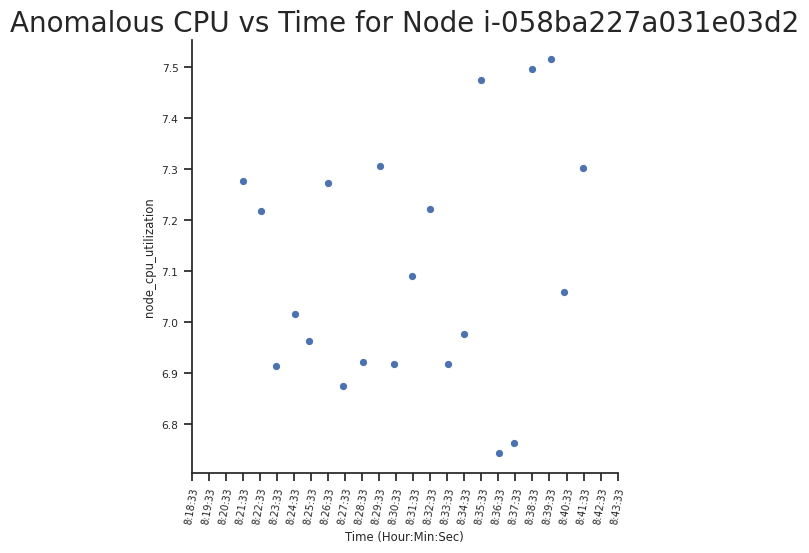

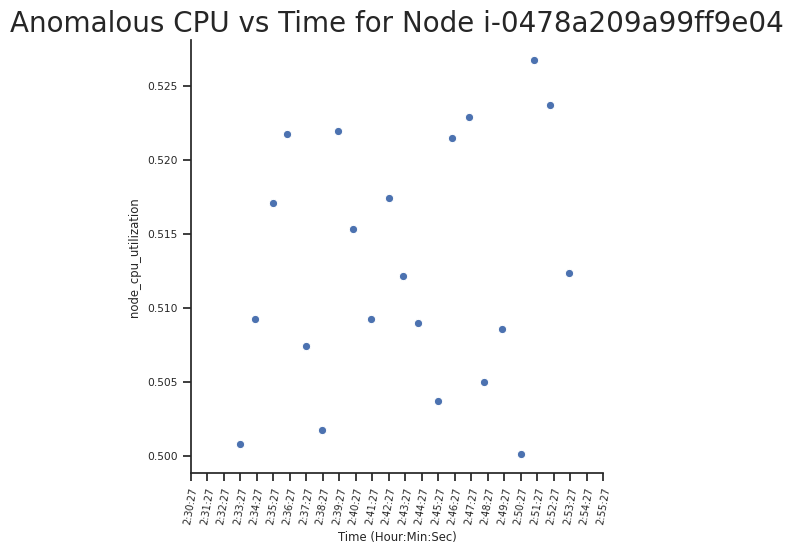

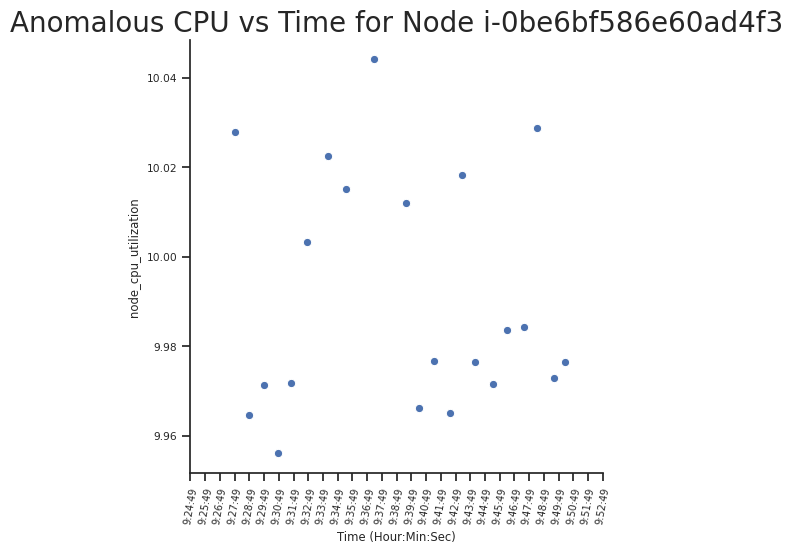

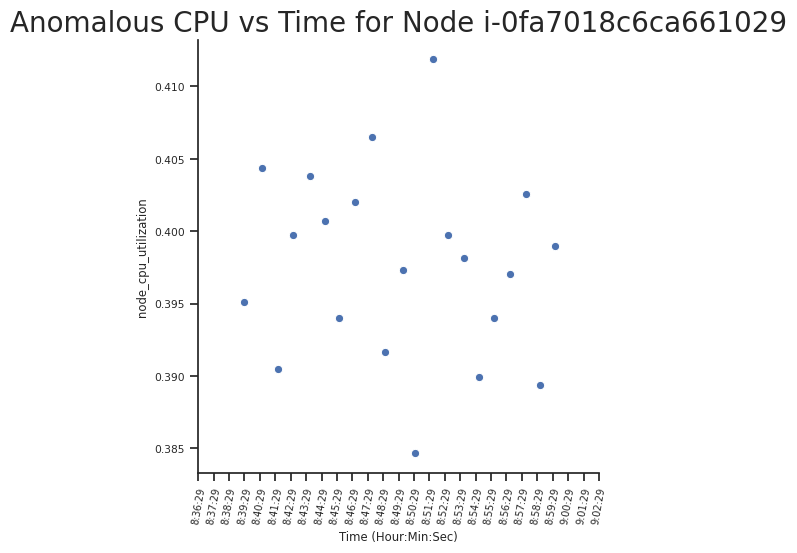

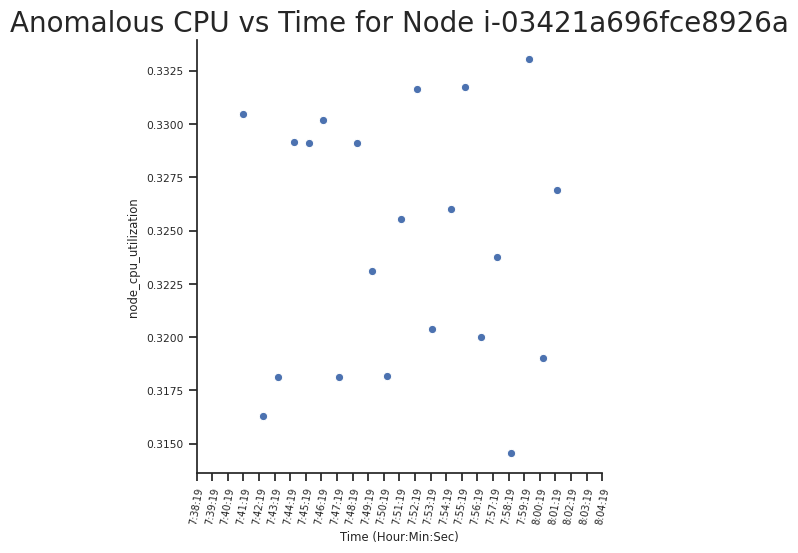

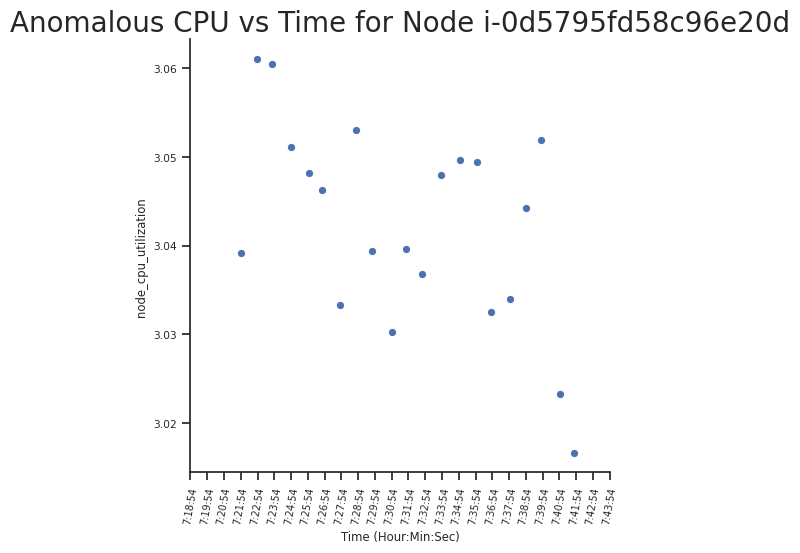

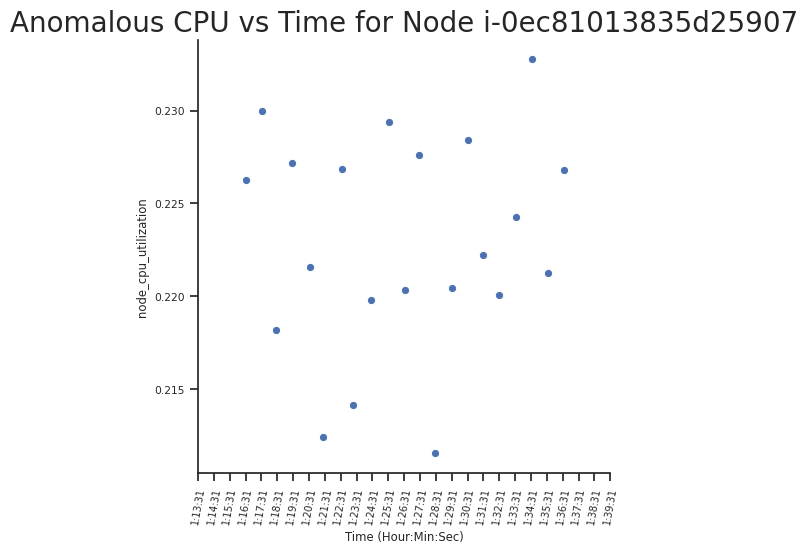

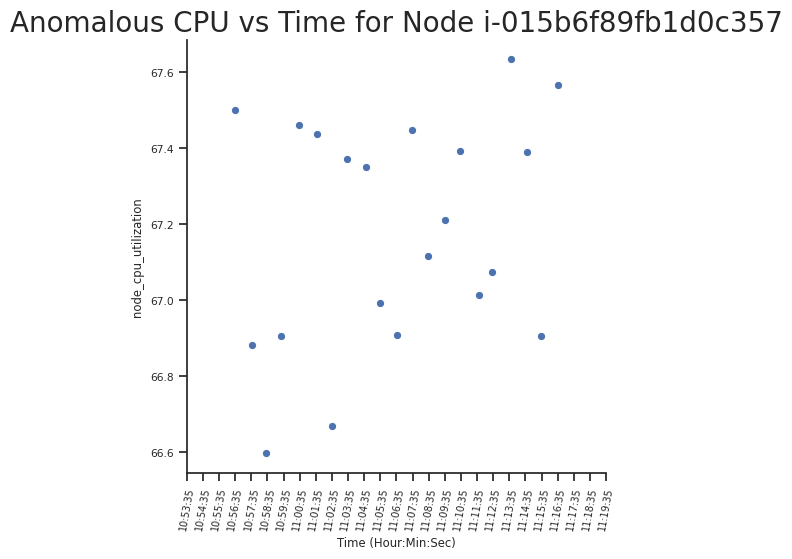

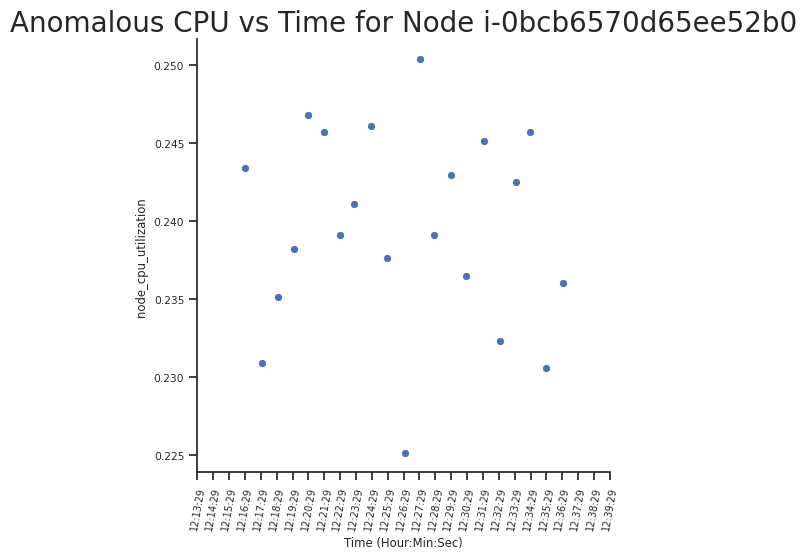

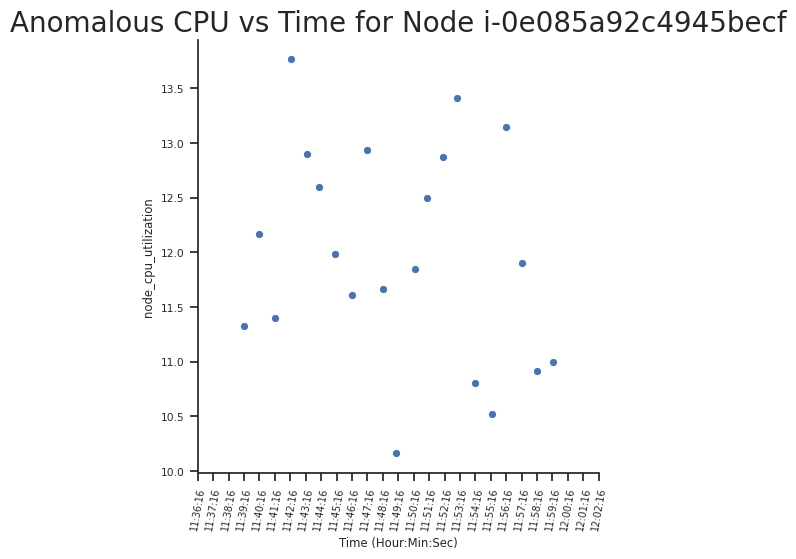

In [16]:
##grab the ec2_id and timestamp of the biggest cpu anomaly

    ##setup the variables needed to get data for the ec2 in the correct timeframe
for i in range(10):
    row_of_mae = top_ten_cpu.iloc[i]
    lowerbound_timestamp = row_of_mae["start_time"]
    upperbound_timestamp = row_of_mae["end_time"]
    ec2_id = row_of_mae["InstanceId"]
    
    ##now grab the data needed for us to graph the 'anomaly'
    df_tograph = df_all_nodes.loc[(df_all_nodes['InstanceId'] == ec2_id) \
                            & (df_all_nodes['Timestamp'] <= upperbound_timestamp)\
                            & (df_all_nodes['Timestamp'] >= lowerbound_timestamp)]


    ##graphing
    sns.set(style="ticks", font_scale=.7,rc = {'figure.figsize':(25,8), 'axes.facecolor':'white' , "axes.spines.bottom": True})
    g = sns.relplot(data = df_tograph , 
                x= 'Timestamp', y= 'node_cpu_utilization') 
    
    plt.title('Anomalous CPU vs Time for Node {}'.format(ec2_id), fontsize=20)
    plt.xlabel('Time (Hour:Min:Sec)') 
    ##formatting
    dt_min = df_tograph['Timestamp'].min() - timedelta(minutes=3)
    dt_max = df_tograph['Timestamp'].max() + timedelta(minutes=3)
    ticks = pd.date_range(start = dt_min, end=dt_max,freq ='min')
    labels = [tick.strftime('%-I:%M:%S') for tick in ticks]
    plt.xlim([ticks[0], ticks[-1]])
    plt.xticks(ticks = ticks,labels = labels , rotation = 80, fontsize=7) 
  
    plt.show();

Graph the top ten anomalies in memory

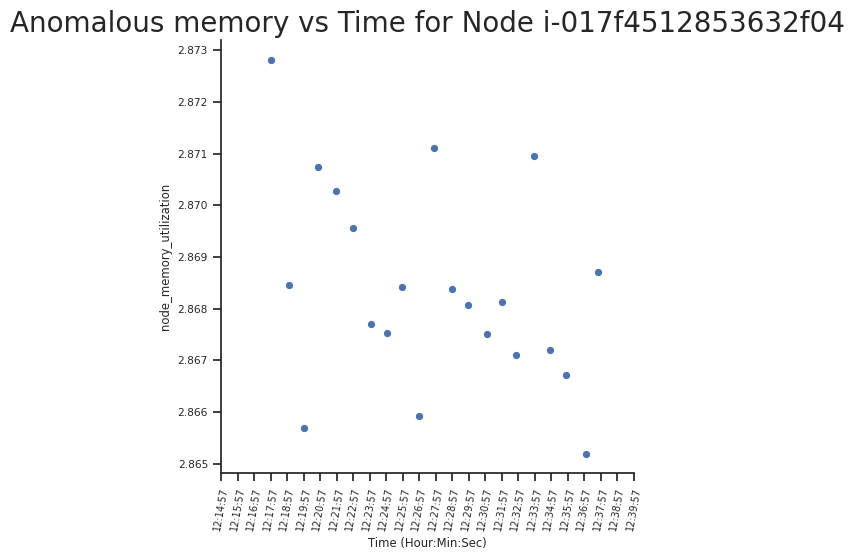

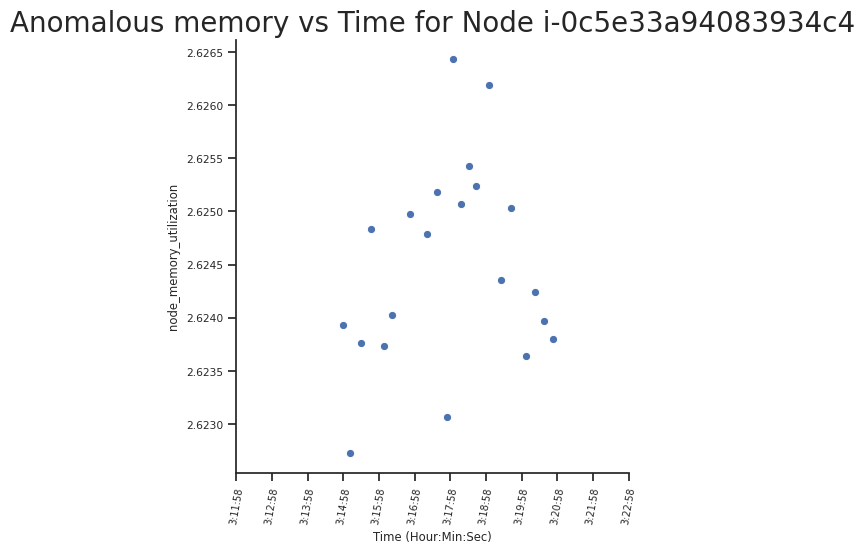

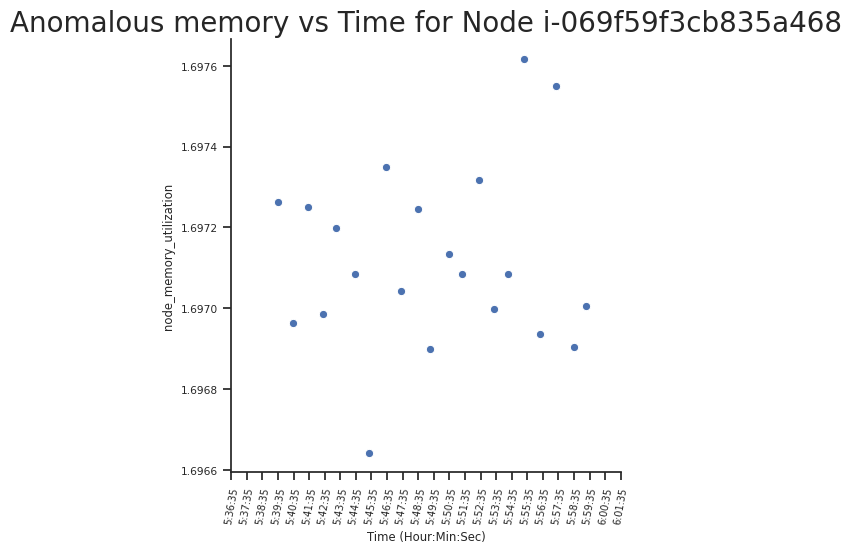

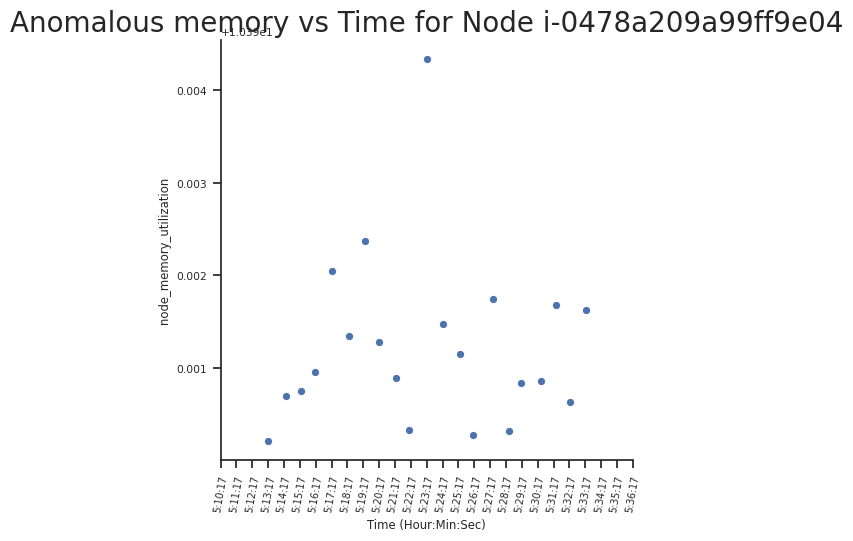

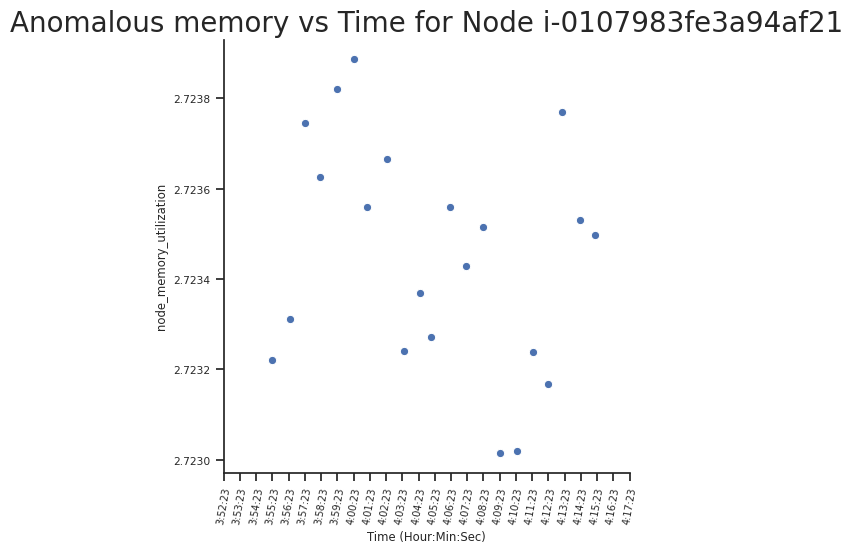

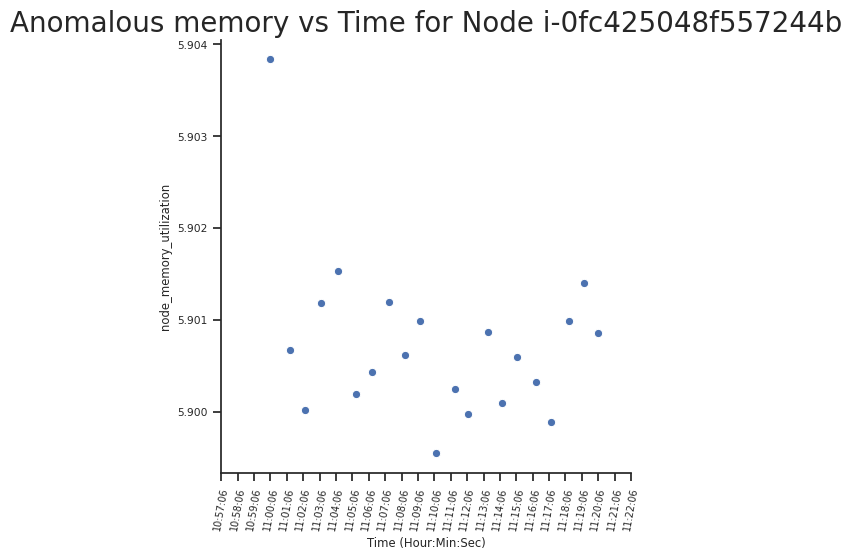

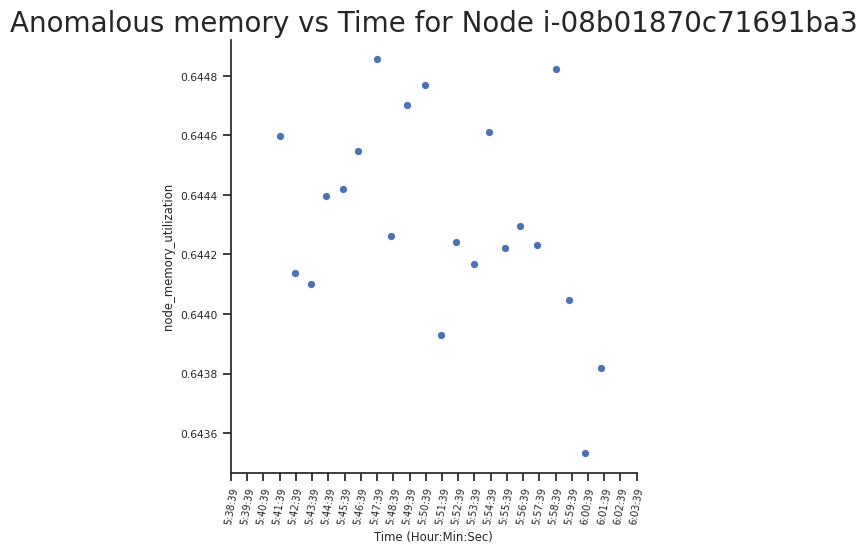

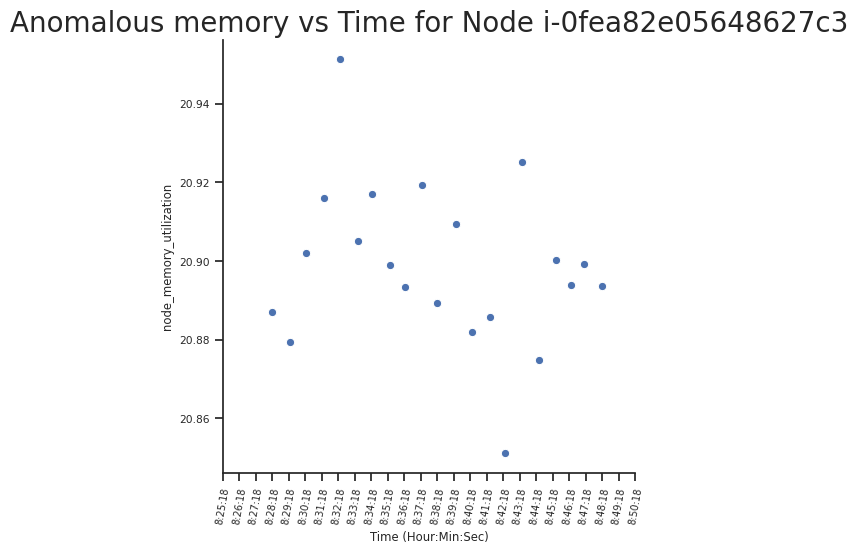

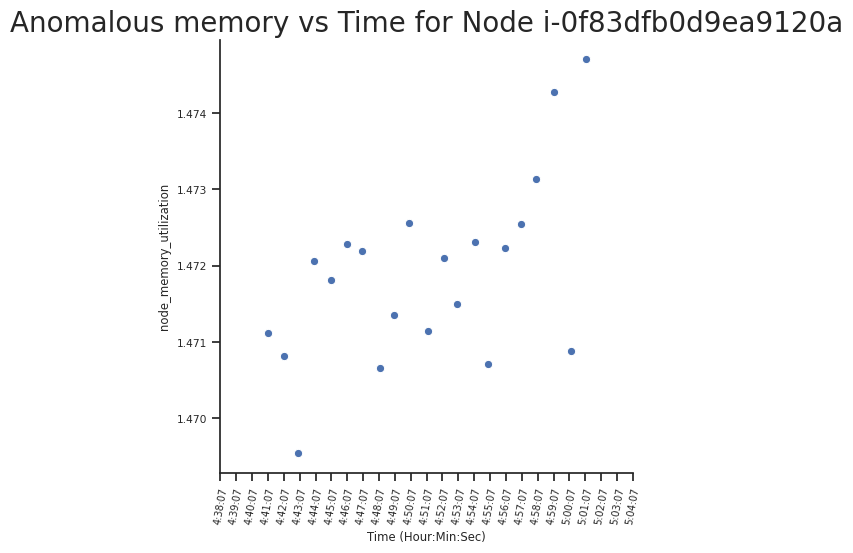

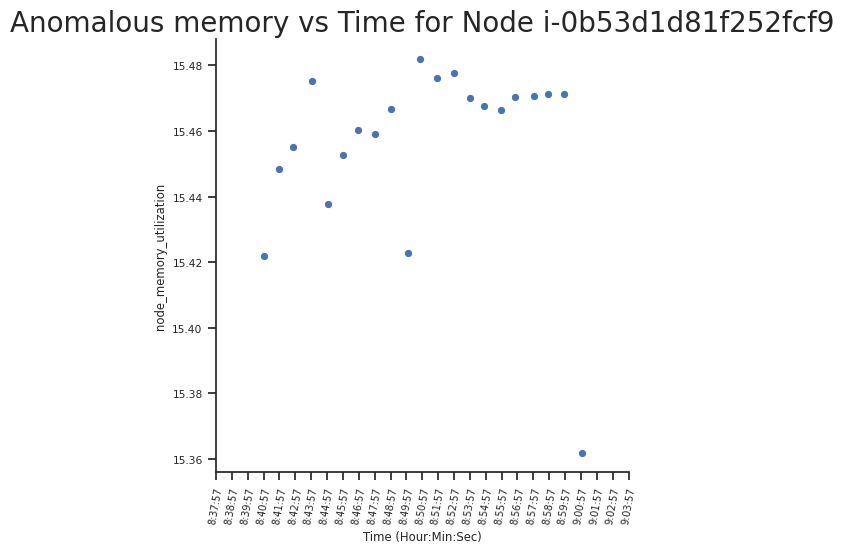

In [17]:
##grab the ec2_id and timestamp of the biggest cpu anomaly

    ##setup the variables needed to get data for the ec2 in the correct timeframe
for i in range(10):
    row_of_mae = top_ten_memory.iloc[i]
    lowerbound_timestamp = row_of_mae["start_time"]
    upperbound_timestamp = row_of_mae["end_time"]
    ec2_id = row_of_mae["InstanceId"]
    
    ##now grab the data needed for us to graph the 'anomaly'
    df_tograph = df_all_nodes.loc[(df_all_nodes['InstanceId'] == ec2_id) \
                            & (df_all_nodes['Timestamp'] <= upperbound_timestamp)\
                            & (df_all_nodes['Timestamp'] >= lowerbound_timestamp)]


    ##graphing
    sns.set(style="ticks", font_scale=.7,rc = {'figure.figsize':(25,8), 'axes.facecolor':'white' , "axes.spines.bottom": True})
    g = sns.relplot(data = df_tograph , 
                x= 'Timestamp', y= 'node_memory_utilization') 
    
    plt.title('Anomalous memory vs Time for Node {}'.format(ec2_id), fontsize=20)
    plt.xlabel('Time (Hour:Min:Sec)') 
    ##formatting
    dt_min = df_tograph['Timestamp'].min() - timedelta(minutes=3)
    dt_max = df_tograph['Timestamp'].max() + timedelta(minutes=3)
    ticks = pd.date_range(start = dt_min, end=dt_max,freq ='min')
    labels = [tick.strftime('%-I:%M:%S') for tick in ticks]
    plt.xlim([ticks[0], ticks[-1]])
    plt.xticks(ticks = ticks,labels = labels , rotation = 80, fontsize=7) 
  
    plt.show();

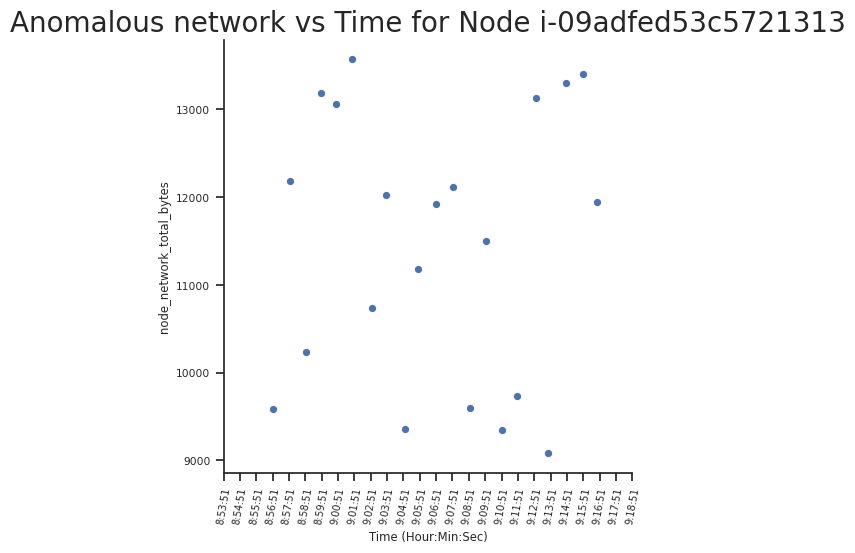

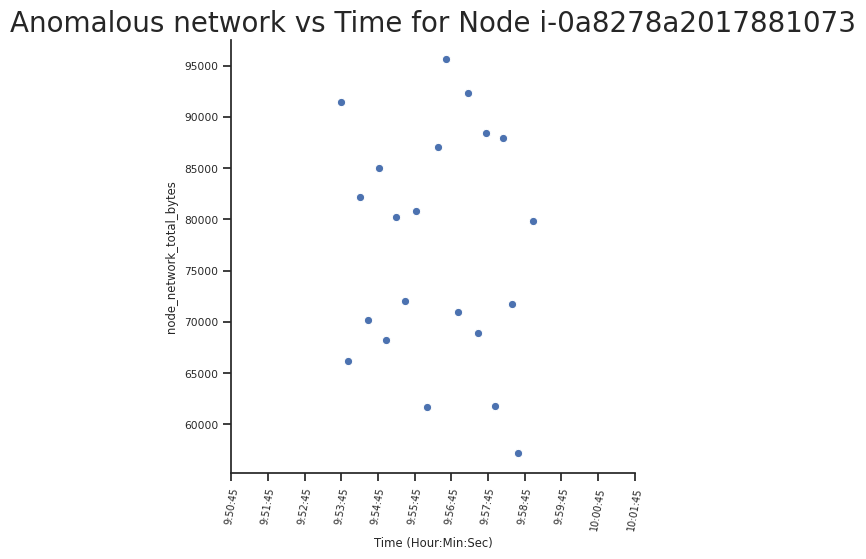

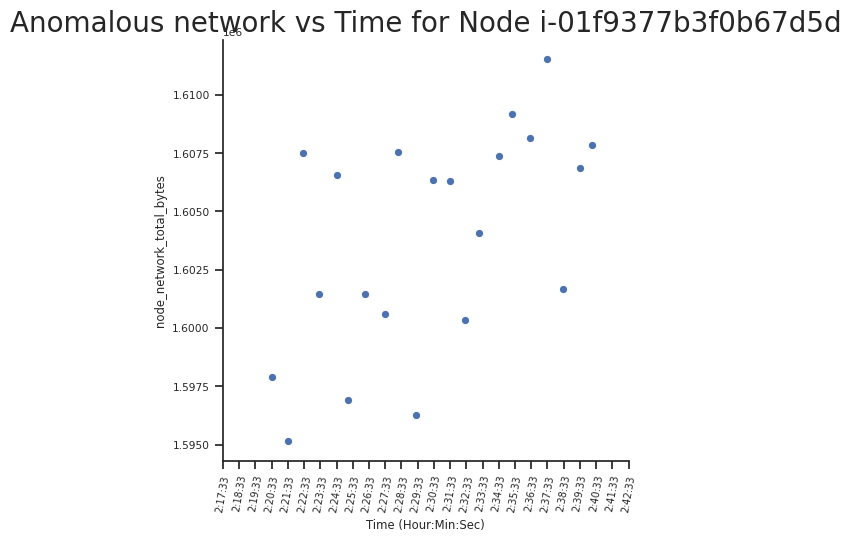

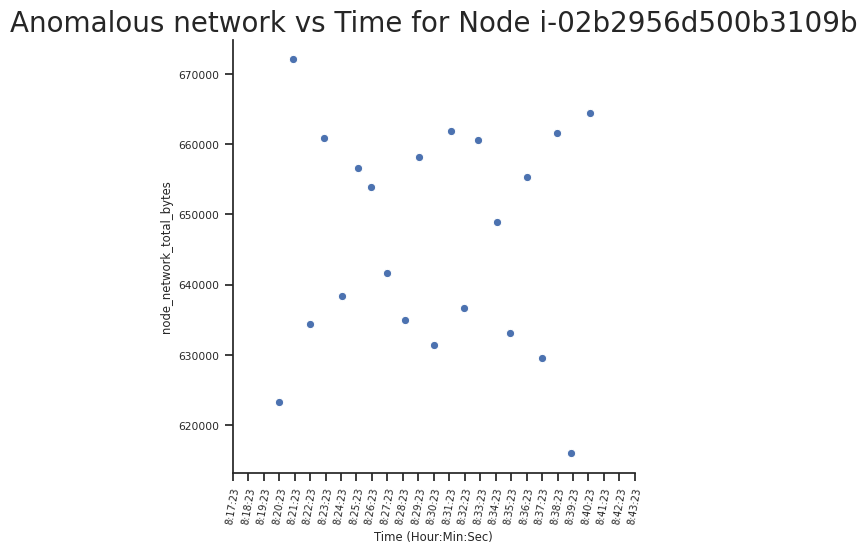

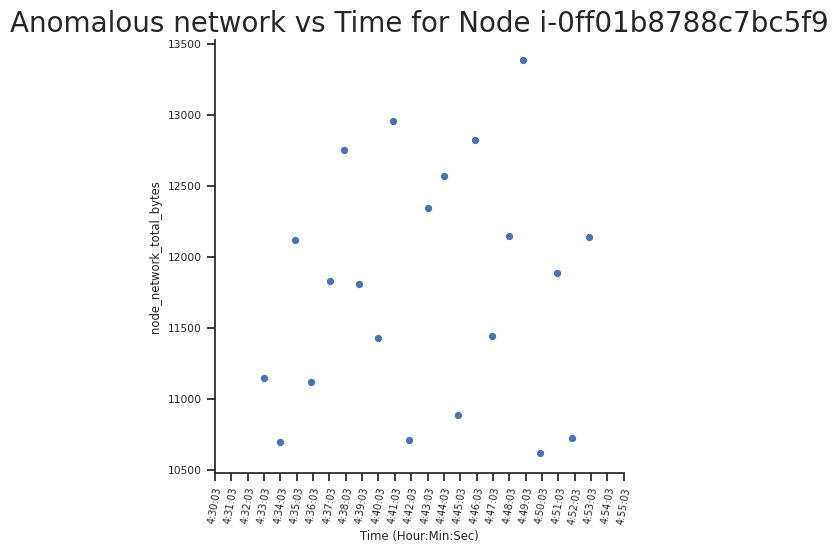

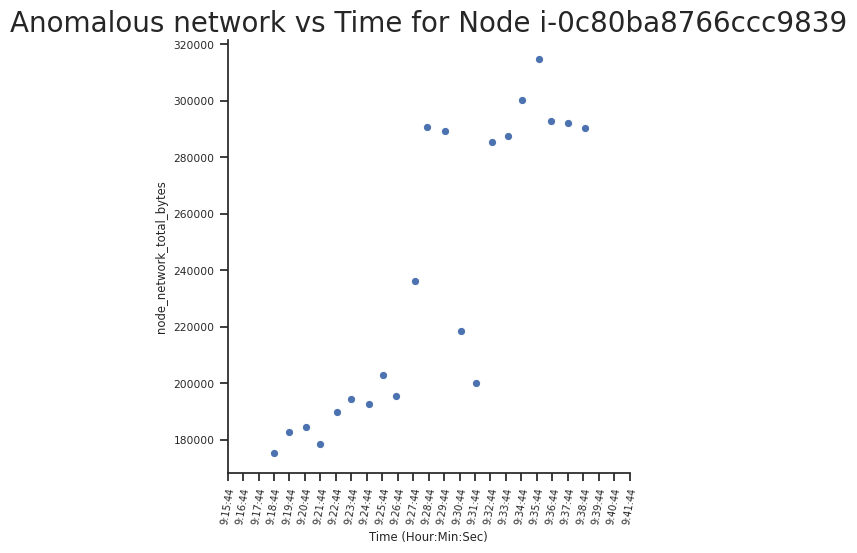

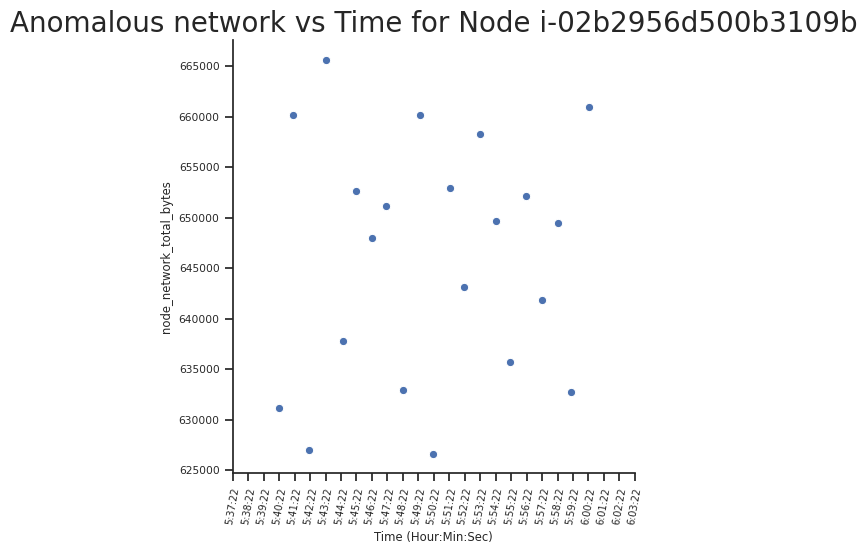

In [ ]:
##grab the ec2_id and timestamp of the biggest cpu anomaly

    ##setup the variables needed to get data for the ec2 in the correct timeframe
for i in range(10):
    row_of_mae = top_ten_ntwrk.iloc[i]
    lowerbound_timestamp = row_of_mae["start_time"]
    upperbound_timestamp = row_of_mae["end_time"]
    ec2_id = row_of_mae["InstanceId"]
    
    ##now grab the data needed for us to graph the 'anomaly'
    df_tograph = df_all_nodes.loc[(df_all_nodes['InstanceId'] == ec2_id) \
                            & (df_all_nodes['Timestamp'] <= upperbound_timestamp)\
                            & (df_all_nodes['Timestamp'] >= lowerbound_timestamp)]


    ##graphing
    sns.set(style="ticks", font_scale=.7,rc = {'figure.figsize':(25,8), 'axes.facecolor':'white' , "axes.spines.bottom": True})
    g = sns.relplot(data = df_tograph , 
                x= 'Timestamp', y= 'node_network_total_bytes') 
    
    plt.title('Anomalous network vs Time for Node {}'.format(ec2_id), fontsize=20)
    plt.xlabel('Time (Hour:Min:Sec)') 
    ##formatting
    dt_min = df_tograph['Timestamp'].min() - timedelta(minutes=3)
    dt_max = df_tograph['Timestamp'].max() + timedelta(minutes=3)
    ticks = pd.date_range(start = dt_min, end=dt_max,freq ='min')
    labels = [tick.strftime('%-I:%M:%S') for tick in ticks]
    plt.xlim([ticks[0], ticks[-1]])
    plt.xticks(ticks = ticks,labels = labels , rotation = 80, fontsize=7) 
  
    plt.show();